# Análisis sobre el impacto del bitcoin en la macroeconomía de El Salvador

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Tratamiento de datos

### Deuda pública de El Salvador

In [12]:
deuda_file_path = "Datos_bitcoin/Deuda_SV/Deuda_Pública_Total_Mensual.csv"
df = pd.read_csv(deuda_file_path, encoding='ISO-8859-1', sep=",")

data = {"Deuda total en millones": df.iloc[3, 1:].values}
df_deuda = pd.DataFrame(data, index = df.iloc[2, 1:].values)
df_deuda.index.name = "Fecha"
df_deuda["Deuda total en millones"] = df_deuda["Deuda total en millones"].astype(float)
df_deuda.head()

,Deuda total en millones
Fecha,
2019-01,19115.16
2019-02,19135.14
2019-03,19286.60
2019-04,19273.34
2019-05,19240.87


#### Diagrama lineal

In [9]:
# codigo para mostrar diagrama lineal

### Índice de precios al consumidor (IPC)

In [97]:
ipc_file_path = "Datos_bitcoin/IPC_SV/Índice_de_Precios_al_Consumidor_(IPC).csv"

df_ipc = pd.read_csv(ipc_file_path, encoding='ISO-8859-1', sep=",", skiprows=4)
df_ipc = df_ipc.iloc[:-2]

data = {}
fechas = pd.date_range(start="2019-01-01", end="2022-12-01", freq="MS")
columnas = [
    "Índice general", 
    "Alimentos y bebidas no alcohólicas", 
    "Bebidas alcohólicas, tabaco", 
    "Prendas de vestir y calzado",
    "Alojamiento, agua, electricidad, gas y otros combustibles"    ,
    "Muebles, artículos para el hogar y para la conservación ordinaria del hogar",
    "Salud",
    "Transporte",
    "Comunicaciones",
    "Recreación y cultura",
    "Educación",
    "Restaurantes y hoteles",
    "Bienes y servicios diversos"
]

for i in range(0, len(df_ipc)):
    data[i] = df_ipc.iloc[i, 1:-1].values

df_ipc = pd.DataFrame(data)
df_ipc.columns = columnas
df_ipc.index = fechas
df_ipc.index.name = "Fecha"
df_ipc = df_ipc.astype(float)
df_ipc.head()

,Índice general,Alimentos y bebidas no alcohólicas,"Bebidas alcohólicas, tabaco",Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Comunicaciones,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos
Fecha,,,,,,,,,,,,,
2019-01-01,112.24,120.81,147.30,92.76,137.52,100.29,99.29,106.83,84.64,87.77,113.27,123.41,107.39
2019-02-01,112.44,121.12,146.86,92.93,137.35,100.52,99.27,107.41,84.32,88.71,113.27,123.37,107.40
2019-03-01,112.69,121.39,146.84,92.89,137.51,100.16,99.27,108.94,84.32,88.48,113.27,123.54,107.55
2019-04-01,112.87,121.71,147.11,92.90,136.16,100.25,99.34,111.01,84.32,88.72,113.27,123.49,107.36
2019-05-01,113.01,122.29,147.74,92.69,135.75,100.30,99.44,111.41,84.31,88.75,113.27,123.57,107.13


#### Diagrama lineal

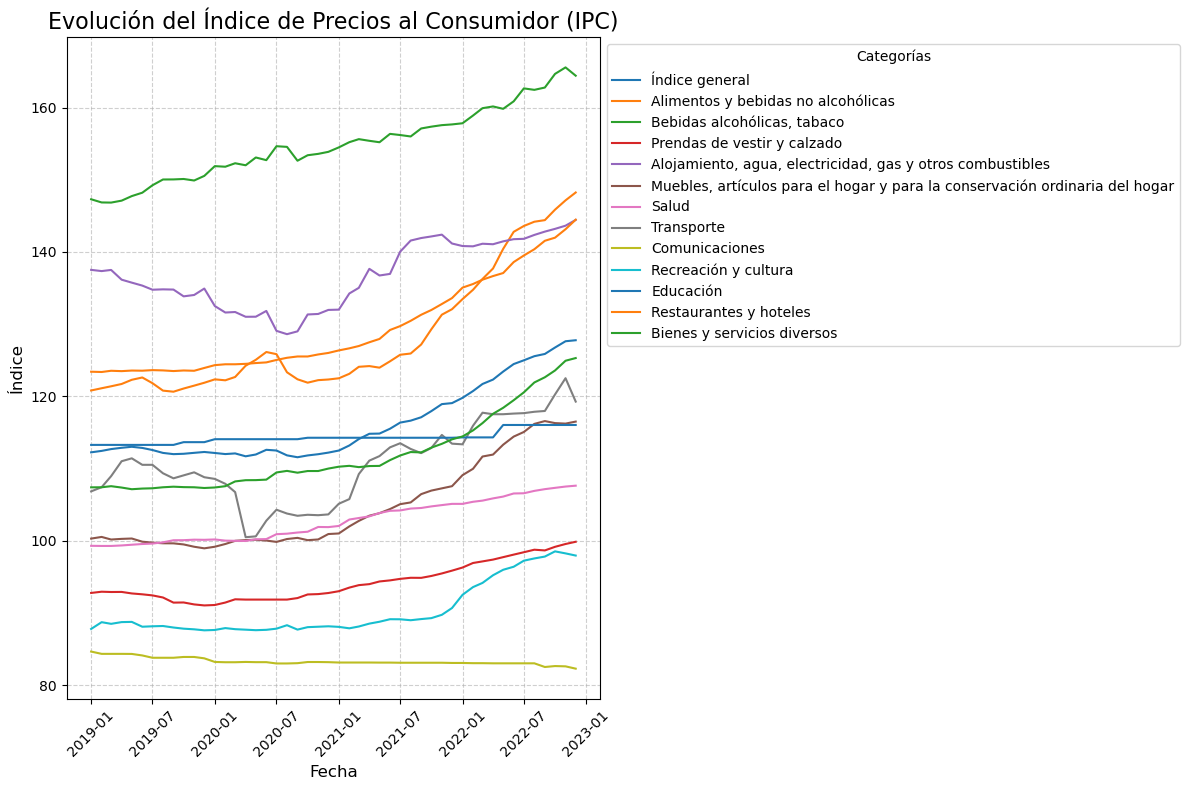

In [66]:
plt.figure(figsize=(12, 8))
for column in df_ipc.columns:
    plt.plot(df_ipc.index, df_ipc[column], label=column)

plt.title("Evolución del Índice de Precios al Consumidor (IPC)", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.xticks(rotation=45)
plt.ylabel("Índice", fontsize=12)
plt.legend(title="Categorías", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Producto interno bruto (PIB) de El Salvador

In [15]:
#file_path = '/content/drive/MyDrive/Datos bitcoin/Inversion_SV/Posición_de_Inversión_Internacional_a_fin_de_período.csv'
file_path = "Datos_bitcoin/PIB_SV/Producto_Interno_Bruto__Producción_Gasto_e_Ingreso_A_precios_corrientes.csv"


df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=',', skiprows=4)
pib = pd.Series(df.columns[1:])

df_pib = pd.DataFrame(pib, columns=["PIB en millones"])
df_pib.index = [2019, 2020, 2021, 2022, 2023]
df_pib.index.name = "Año"
df_pib["PIB en millones"] = df_pib["PIB en millones"].astype(float)
df_pib = df_pib.drop(index=[2023], axis=0)
df_pib

,PIB en millones
Año,
2019,26881.14
2020,24921.19
2021,29043.14
2022,31988.92


#### Diagrama lineal

In [16]:
# Código para mostrar el diagrama lineal

### Inversion extranjera

In [17]:
# Código para mostrar el dataframe de inversión extranjera

#### Diagrama lineal

In [18]:
# Código para mostrar el diagrama lineal de la inversion extranjera

### Precio histórico del Bitcoin

In [96]:
btc_file_path = "Datos_bitcoin/btc history/Bitcoin history.csv"
df = pd.read_csv(btc_file_path, encoding='ISO-8859-1', sep=",")
df.rename(columns={'ï»¿"Date"': 'Date'}, inplace=True)
df.set_index("Date", inplace=True)
df.head()


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
"Feb 09, 2024","47,545.4","45,293.3","47,710.2","45,254.2",86.85K,4.97%
"Feb 08, 2024","45,293.3","44,346.2","45,579.2","44,336.4",66.38K,2.15%
"Feb 07, 2024","44,339.8","43,088.4","44,367.9","42,783.5",48.57K,2.91%
"Feb 06, 2024","43,087.7","42,697.6","43,375.5","42,566.8",33.32K,0.91%
"Feb 05, 2024","42,697.2","42,581.4","43,532.2","42,272.5",39.26K,0.27%


#### Diagrama lineal

In [20]:
# Código para mostrar el diagrama lineal

### Reserva nacional

In [21]:
# Código para mostrar el dataframe de la reserva nacional

#### Diagrama lineal

In [22]:
# Código para el diagrama lineal

### CSV restantes